# 監督式學習與 scikit-learn

## 郭耀仁

## 機器學習的定位

![](https://ingomierswacom.files.wordpress.com/2017/04/ai_ml_dl.jpg?w=676)

Source: [rapidminer](https://rapidminer.com/artificial-intelligence-machine-learning-deep-learning/)

## 定義機器學習

[Arthur Samuel](https://en.wikipedia.org/wiki/Arthur_Samuel)
> The field of study that gives computers the ability to learn without being explicitly programmed.

## 定義機器學習（2）

[Tom Mitchell](http://www.cs.cmu.edu/~tom/)
> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.

## 定義機器學習（3）

[林軒田](http://www.csie.ntu.edu.tw/~htlin/)
> 我們從小是怎麼樣辨認一棵樹的，是爸爸媽媽告訴我們一百條規則來定義嗎？其實不是的，很大一部分是透過我們自己的觀察很多的樹與不是樹之後，得到並且內化了辨認一棵樹的技巧，機器學習想要做的就是一樣的事情。

## 機器學習的種類

- 監督式學習（Supervised Learning）：具有目標變數的 Labeled data
    - Gmail 會幫你分類郵件
    - [Jin Yang's Hot Dog Claasifier](https://youtu.be/ACmydtFDTGs)
- 非監督式學習（Unsupervised Learning）：沒有目標變數的 Unlabeled data
    - 將客戶分成不同的 Segments
    - 降維時所使用的主成份分析

## 機器學習的種類（2）

- 監督式學習（Supervised Learning）
    - 迴歸問題：目標變數是連續型（數值），像是股價、氣溫、匯率、房價...等
    - 分類問題：目標變數是離散型（類別），像是垃圾郵件/非垃圾郵件、熱狗/非熱狗...等

## 認識 Scikit-Learn

- 用來實作資料探勘與機器學習的 Python 套件
- 建構於 NumPy，SciPy 與 Matplotlib 套件之上
- 有[六大功能模組](http://scikit-learn.org/stable/index.html)：
    - 預處理
    - 降維
    - 迴歸
    - 分群
    - 分類
    - 模型評估

## 認識 Scikit-Learn（2）

- [其他的 Scikits](https://scikits.appspot.com/scikits)
- [Scikit-Learn 機器學習地圖](http://scikit-learn.org/stable/tutorial/machine_learning_map/)

## 迴歸問題

## 迴歸問題有哪些？

- 利用月收入來核定信用卡額度
- 利用坪數、房間數來預測房價
- 利用每日最高氣溫來預測飲料店的冰紅茶銷量
- ...etc.

## 大家都在尋找 $f$

$$y = f(x)$$

- 但沒有人知道 $f$ 到底為何、是否存在？我們只能假設：

$$\hat{y} = h(x)$$

## 當 $\hat{y}$ 與 $y$ 之間的差異愈小，我們更有自信地說 $h$ 跟 $f$ 愈相似

- 成本函數

$$ \text{minimize:} \frac{1}{2m}\sum_{i=1}^{m}(\hat{y_i}-y_i)^2$$

## 將 $h$ 表示得更完整

$$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

- 假如我們令 $x_0 = 1$，就可以將式子廣義地表示為：

$$h(x) = \begin{bmatrix} \theta_0 & \theta_1 & ... & \theta_n \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\.\\.\\.\\ x_n \end{bmatrix} = \theta^{T}x$$

## Scikit-Learn 的任務

- 找到一組 $\theta$ 讓成本函數最小化

## 訓練（train）與測試樣本（test）

- 訓練樣本用來建立 $h(x)$
- 將測試樣本投入 $h(x)$ 建立預測 $\hat{y}$
- 比對測試樣本的 $y$ 與 $\hat{y}$ 來評估 $h(x)$

## 評估迴歸模型的指標

- RMSE（愈低愈好）

$$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^N(\hat{y_i} - y_i) ^ 2}$$

- R-squared（愈接近 1 愈好）

$$R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\frac{1}{n}\sum_{i=1}^N(\hat{y_i} - y_i)^2}{\frac{1}{n}\sum_{i=1}^N(y_i - \mu)^2} = 1 - \frac{MSE}{Var(y)}$$

## 迴歸問題範例

- 載入 boston 範例資料，切分為訓練和測試資料

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


## 利用 LSTAT 來預測 MEDV，使用 sklearn 建立線性迴歸模型

In [2]:
from sklearn.linear_model import LinearRegression

LSTAT = X_train[:, -1].reshape(-1, 1)
MEDV = y_train.reshape(-1, 1)
regr = LinearRegression()
regr.fit(LSTAT, MEDV)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 畫出訓練資料散佈點與迴歸線

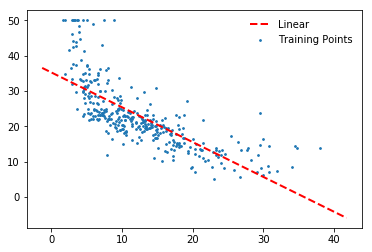

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X_fit = np.linspace(LSTAT.min() - 3, LSTAT.max()*1.1, 50).reshape(-1, 1)
y_lin_fit = regr.predict(X_fit)

# plotting
plt.scatter(LSTAT, MEDV, label = "Training Points", s = 3)
plt.plot(X_fit, y_lin_fit, label = "Linear", linestyle = "--", c = "r", linewidth = 2)
plt.legend(loc = "upper right", frameon = False)
plt.show()

## 加入二次項與三次項建立迴歸模型，並將迴歸線加入圖中

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# create polynomial features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
LSTAT_quad = quadratic.fit_transform(LSTAT)
LSTAT_cubic = cubic.fit_transform(LSTAT)

# quadratic fit
regr_q = LinearRegression()
regr_q = regr_q.fit(LSTAT_quad, MEDV)
y_quad_fit = regr_q.predict(quadratic.fit_transform(X_fit))

# cubic fit
regr_c = LinearRegression()
regr_c = regr_c.fit(LSTAT_cubic, MEDV)
y_cubic_fit = regr_c.predict(cubic.fit_transform(X_fit))

# plotting
plt.scatter(LSTAT, MEDV, label = "Training Points", s = 3, c = "k")
plt.plot(X_fit, y_lin_fit, label = "Linear", linestyle = "--", c = "r", linewidth = 2)
plt.plot(X_fit, y_quad_fit, label = "Quadratic", linestyle = "--", c = "g", linewidth = 2)
plt.plot(X_fit, y_cubic_fit, label = "Cubic", linestyle = "--", c = "b", linewidth = 2)
plt.legend(loc = "upper right", frameon = False)

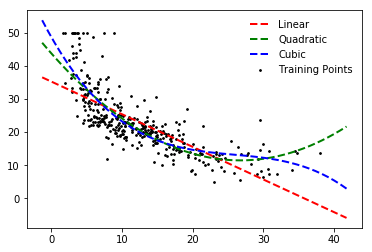

In [5]:
plt.show()

## 利用測試資料計算三個模型的 $R^2$ 與 RMSE

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# X_test
LSTAT_test = X_test[:, -1]
LSTAT_test = LSTAT_test.reshape(-1, 1)

# y_hats
y_lin_hat = regr.predict(LSTAT_test)
y_quad_hat = regr_q.predict(quadratic.fit_transform(LSTAT_test))
y_cubic_hat = regr_c.predict(cubic.fit_transform(LSTAT_test))

# rmse
rmse_lin = np.sqrt(mean_squared_error(y_test, y_lin_hat))
rmse_quad = np.sqrt(mean_squared_error(y_test, y_quad_hat))
rmse_cubic = np.sqrt(mean_squared_error(y_test, y_cubic_hat))

# r^2
r2_lin = r2_score(y_test, y_lin_hat)
r2_quad = r2_score(y_test, y_quad_hat)
r2_cubic = r2_score(y_test, y_cubic_hat)

labels = ["Linear", "Quadratic", "Cubic"]
r2s = [r2_lin, r2_quad, r2_cubic]
rmses = [rmse_lin, rmse_quad, rmse_cubic]

# Print out
for (label, r2, rmse) in zip(labels, r2s, rmses):
    print("[%s] R Squared: %.4f; RMSE: %.4f"%(label, r2, rmse))

[Linear] R Squared: 0.4887; RMSE: 6.1724
[Quadratic] R Squared: 0.5762; RMSE: 5.6196
[Cubic] R Squared: 0.6058; RMSE: 5.4194


## 分類問題

## 分類問題有哪些？

- 貸款顧客是否會倒帳
- 圖片辨識
- 垃圾郵件辨識
- ...etc.

## 迴歸問題的延伸

- 將 $h(x) = \theta^Tx$ 的結果利用**特定函數**轉換為簡單分類器
    - 感知器利用 *sign* 函數
    - 羅吉斯迴歸利用 *sigmoid* 函數
    - ...etc.

## 感知器利用 *sign* 函數

$$\hat{y} = H(\theta^{T}x)$$
其中，
$$  H(z)=
  \begin{cases}
    1       & \quad \text{if } z\geq 0.5\\
    0  & \quad \text{otherwise}\\
  \end{cases}
$$

## 羅吉斯迴歸利用 *sigmoid* 函數

$$\hat{y} = H(g(\theta^{T}x))$$
其中，
$$g(z) = \frac{1}{1+e^{-z}}$$
$$  H(z)=
  \begin{cases}
    1       & \quad \text{if } z\geq 0.5\\
    0  & \quad \text{otherwise}\\
  \end{cases}
$$

## $\theta^Tx$ 為決策邊界

- 同樣請 scikit-learn 幫我們找到讓成本函數最低（誤分類率最低）的 $\theta$
    - 羅吉斯回歸
    - 隨機森林
    - 支援向量機

In [1]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

lg = LogisticRegression()
lg.fit(X, y)


plot_decision_regions(X, y, clf = lg,
                      res = 0.02, legend = 2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Logistic Regression on Iris')

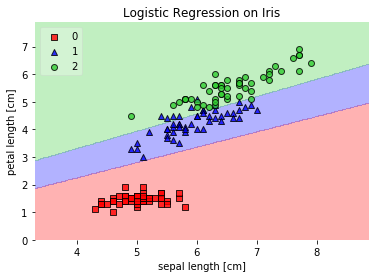

In [2]:
plt.show()

In [3]:
from sklearn.ensemble import RandomForestClassifier

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

rf = RandomForestClassifier()
rf.fit(X, y)


plot_decision_regions(X, y, clf = rf,
                      res = 0.02, legend = 2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Random forest on Iris')

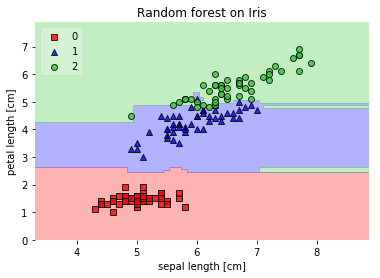

In [4]:
plt.show()

In [5]:
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

svm = SVC()
svm.fit(X, y)


plot_decision_regions(X, y, clf = svm,
                      res = 0.02, legend = 2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Support vector machine on Iris')

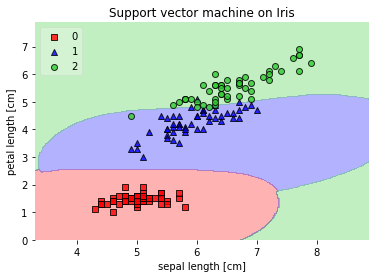

In [6]:
plt.show()